**Lab1**
1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:
- small decision tree;
- deep decision tree;
- random forest on small trees;
- random forest on deep trees;
2. Calculate the following metrics to check the quality of your models:
- precision;
- recall;
- accuracy;
- F1-score;
- log-loss;
3. Plot precision-recall and ROC curves for your models.
4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics  from p.2 for it.


In [ ]:
//
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, precision_recall_curve, roc_curve, roc_auc_score
from matplotlib import pyplot as plt
import seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Preprocessing

In [ ]:
# reading csv file

df = pd.read_csv('/content/drive/MyDrive/Studies/Data for labs/bioresponse.csv')

In [ ]:
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


We are predicting the Activity

In [ ]:
# Choosing the target variable
y = df['Activity'].values
X_init = df.drop(['Activity'], axis =1)

In [ ]:
# Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X_init)

In [ ]:
# Creating Train and Test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Small decision tree

## Training

In [ ]:
# training a shallow tree, i.e. with a max_depth = 2
model_1 = tree.DecisionTreeClassifier(random_state = 42, max_depth = 2)
model_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
#saving the predictions and their probabilities
predictions_1 = model_1.predict(X_test)
probabilities_1 = model_1.predict_proba(X_test)

## Metrics

In [ ]:
# Calculating the metrics
precision_1 = precision_score(y_test, predictions_1)
recall_1 = recall_score(y_test, predictions_1)
accuracy_1 = accuracy_score(y_test, predictions_1)
f1_score_1 = f1_score(y_test, predictions_1)
logloss_1 = log_loss(y_test, predictions_1)

In [ ]:
# Calculation output
print("Precision = ", precision_1)
print("Recall  = ", recall_1)
print('Accuracy = ', accuracy_1)
print("F1 score = ", f1_score_1)
print("Log-loss = ", logloss_1)

Precision =  0.7866449511400652
Recall  =  0.7654516640253566
Accuracy =  0.7522202486678508
F1 score =  0.7759036144578313
Log-loss =  8.558102452436444


# Plotting

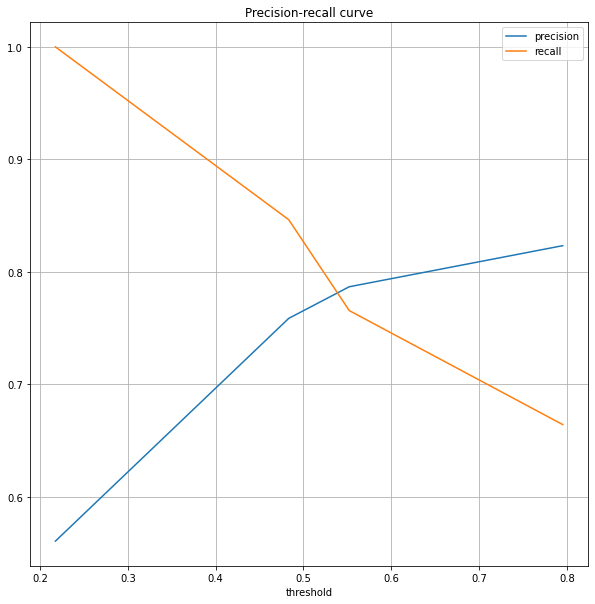

In [ ]:
# Precision-recall curve
prec, rec, thresh = precision_recall_curve(y_test, probabilities_1[:,1])

ax = plt.figure(figsize = (10, 10))
plt.plot(thresh, prec[:-1], label = 'precision')
plt.plot(thresh, rec[:-1], label = 'recall')
plt.grid()
plt.xlabel("threshold")
plt.title('Precision-recall curve')
plt.legend()

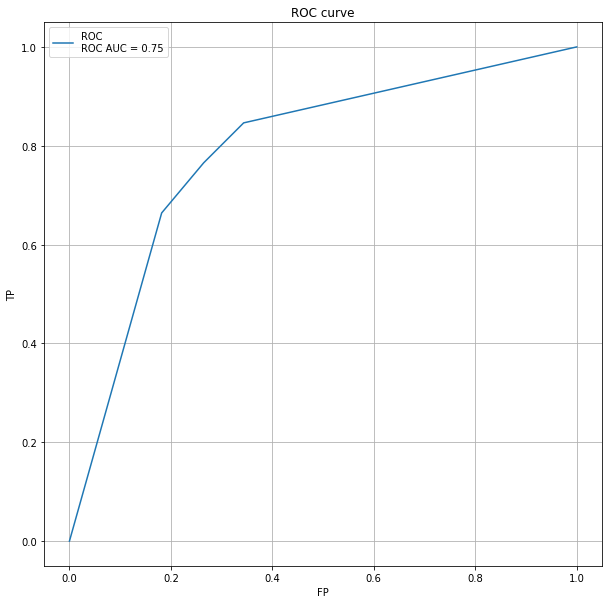

In [ ]:
# ROC curve

fpr, tpr, thr = roc_curve(y_test, probabilities_1[:,1])
roc_auc = roc_auc_score(y_test, predictions_1)

plt.figure(figsize = (10, 10))
plt.plot(fpr, tpr, label = 'ROC\n' + 'ROC AUC = ' + str(round(roc_auc, 2)))
plt.grid()
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC curve')
plt.legend()

## Avoiding Type II errors

In [ ]:
def classifier(actual, predicted):
  '''
  avoids FN
  returns 2 arrays of actual and predicted Y without FN results
  '''
  result1 = []
  result2 = []
  for a, b in zip(actual, predicted):
    if a == 1:
      if b == 1:
        result1.append(a)
        result2.append(b)
    else:
        result1.append(a)
        result2.append(b)

  return result1, result2

In [ ]:
#Cleaning from FN results
y_act, y_pred = classifier(y_test, predictions_1)

In [ ]:
#Calculating the metrics after the changes again

precision_new = precision_score(y_act, y_pred)
recall_new = recall_score(y_act, y_pred)
accuracy_new = accuracy_score(y_act, y_pred)
f1_score_new = f1_score(y_act, y_pred)
logloss_new = log_loss(y_act, y_pred)

In [ ]:
print("Precision = ", precision_new)
print("Recall  = ", recall_new)
print('Accuracy = ', accuracy_new)
print("F1 score = ", f1_score_new)
print("Log-loss = ", logloss_new)

Precision =  0.7866449511400652
Recall  =  1.0
Accuracy =  0.8660531697341514
F1 score =  0.8805834092980857
Log-loss =  4.6264667229004655


# Deep decision tree

## Training

In [ ]:
model_2 = tree.DecisionTreeClassifier(random_state = 42, max_depth = 10)
model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
predictions_2 = model_2.predict(X_test)
probabilities_2 = model_2.predict_proba(X_test)

## Metrics

In [ ]:
precision_2 = precision_score(y_test, predictions_2)
recall_2 = recall_score(y_test, predictions_2)
accuracy_2 = accuracy_score(y_test, predictions_2)
f1_score_2 = f1_score(y_test, predictions_2)
logloss_2 = log_loss(y_test, predictions_2)

In [ ]:
print("Precision = ", precision_2)
print("Recall  = ", recall_2)
print('Accuracy = ', accuracy_2)
print("F1 score = ", f1_score_2)
print("Log-loss = ", logloss_2)

Precision =  0.7692307692307693
Recall  =  0.7606973058637084
Accuracy =  0.7380106571936057
F1 score =  0.7649402390438248
Log-loss =  9.048893586615097


# Plotting

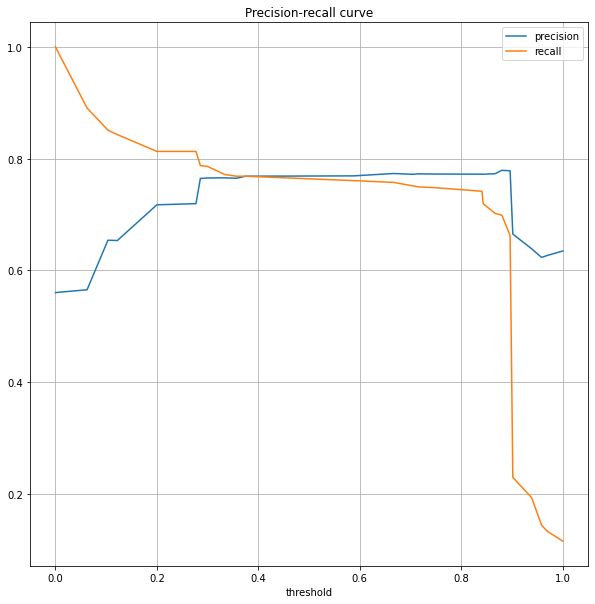

In [ ]:
# Precision-recall curve
prec, rec, thresh = precision_recall_curve(y_test, probabilities_2[:, 1])

ax = plt.figure(figsize = (10, 10))
plt.plot(thresh, prec[:-1], label = 'precision')
plt.plot(thresh, rec[:-1], label = 'recall')
plt.grid()
plt.xlabel("threshold")
plt.title('Precision-recall curve')
plt.legend()

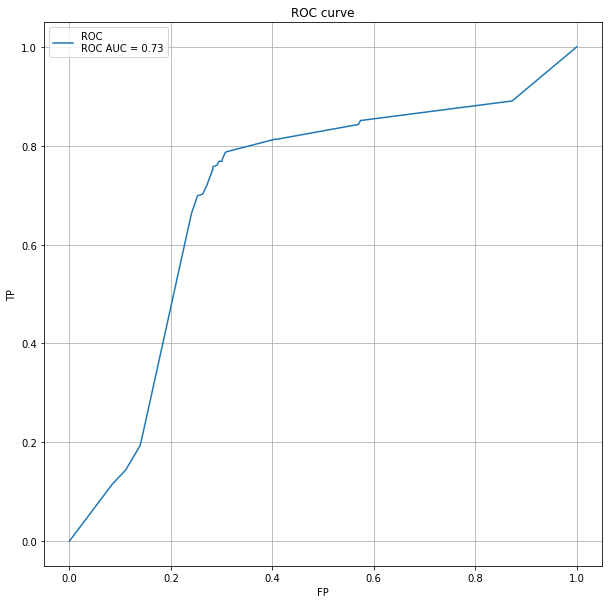

In [ ]:
# ROC curve

fpr, tpr, thr = roc_curve(y_test, probabilities_2[:, 1])
roc_auc = roc_auc_score(y_test, predictions_2)

plt.figure(figsize = (10, 10))
plt.plot(fpr, tpr, label = 'ROC\n' + 'ROC AUC = ' + str(round(roc_auc, 2)))
plt.grid()
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC curve')
plt.legend()

## Avoiding Type II errors

In [ ]:
y_act, y_pred = classifier(y_test, predictions_2)

In [ ]:
precision_new = precision_score(y_act, y_pred)
recall_new = recall_score(y_act, y_pred)
accuracy_new = accuracy_score(y_act, y_pred)
f1_score_new = f1_score(y_act, y_pred)
logloss_new = log_loss(y_act, y_pred)

In [ ]:
print("Precision = ", precision_new)
print("Recall  = ", recall_new)
print('Accuracy = ', accuracy_new)
print("F1 score = ", f1_score_new)
print("Log-loss = ", logloss_new)

Precision =  0.7692307692307693
Recall  =  1.0
Accuracy =  0.8523076923076923
F1 score =  0.8695652173913044
Log-loss =  5.101229685022654


# Random forest on small trees

## Training

In [ ]:
model_3 = RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 42)
model_3.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=42)

In [ ]:
predictions_3 = model_3.predict(X_test)
probabilities_3 = model_3.predict_proba(X_test)

## Metrics

In [ ]:
precision_3 = precision_score(y_test, predictions_3)
recall_3 = recall_score(y_test, predictions_3)
accuracy_3 = accuracy_score(y_test, predictions_3)
f1_score_3 = f1_score(y_test, predictions_3)
logloss_3 = log_loss(y_test, predictions_3)

In [ ]:
print("Precision = ", precision_3)
print("Recall  = ", recall_3)
print('Accuracy = ', accuracy_3)
print("F1 score = ", f1_score_3)
print("Log-loss = ", logloss_3)

Precision =  0.7204610951008645
Recall  =  0.7923930269413629
Accuracy =  0.7113676731793961
F1 score =  0.7547169811320755
Log-loss =  9.969145160077646


# Plotting

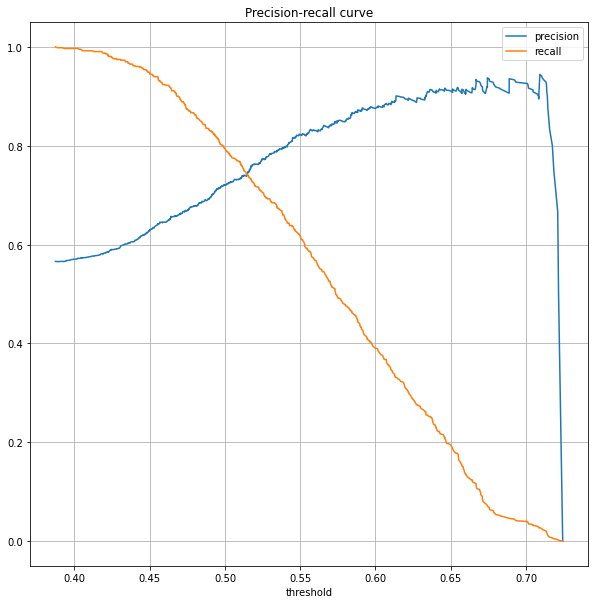

In [ ]:
# Precision-recall curve
prec, rec, thresh = precision_recall_curve(y_test, probabilities_3[:, 1])

ax = plt.figure(figsize = (10, 10))
plt.plot(thresh, prec[:-1], label = 'precision')
plt.plot(thresh, rec[:-1], label = 'recall')
plt.grid()
plt.xlabel("threshold")
plt.title('Precision-recall curve')
plt.legend()

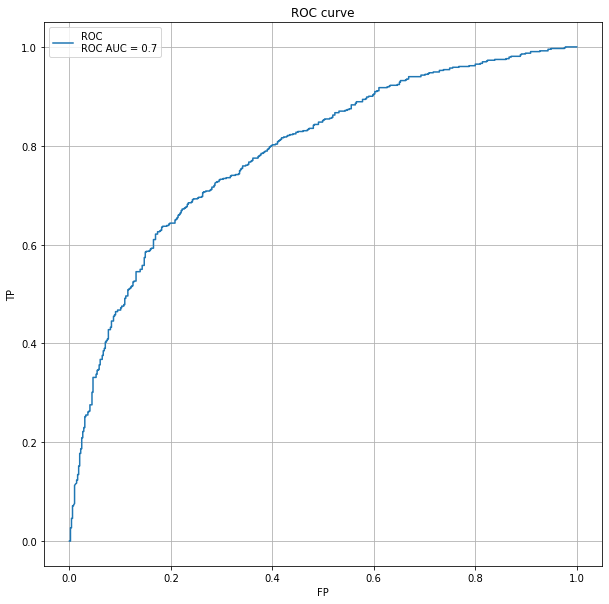

In [ ]:
# ROC curve

fpr, tpr, thr = roc_curve(y_test, probabilities_3[:, 1])
roc_auc = roc_auc_score(y_test, predictions_3)

plt.figure(figsize = (10, 10))
plt.plot(fpr, tpr, label = 'ROC\n' + 'ROC AUC = ' + str(round(roc_auc, 2)))
plt.grid()
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC curve')
plt.legend()

## Avoiding Type II errors

In [ ]:
y_act, y_pred = classifier(y_test, predictions_3)

In [ ]:
precision_new = precision_score(y_act, y_pred)
recall_new = recall_score(y_act, y_pred)
accuracy_new = accuracy_score(y_act, y_pred)
f1_score_new = f1_score(y_act, y_pred)
logloss_new = log_loss(y_act, y_pred)

In [ ]:
print("Precision = ", precision_new)
print("Recall  = ", recall_new)
print('Accuracy = ', accuracy_new)
print("F1 score = ", f1_score_new)
print("Log-loss = ", logloss_new)

Precision =  0.7204610951008645
Recall  =  1.0
Accuracy =  0.8050251256281407
F1 score =  0.8375209380234506
Log-loss =  6.73434948996395


# Random forest on deep trees

## Training

In [ ]:
model_4 = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 42)
model_4.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [ ]:
predictions_4 = model_4.predict(X_test)
probabilities_4 = model_4.predict_proba(X_test)

## Metrics

In [ ]:
precision_4 = precision_score(y_test, predictions_4)
recall_4 = recall_score(y_test, predictions_4)
accuracy_4 = accuracy_score(y_test, predictions_4)
f1_score_4 = f1_score(y_test, predictions_4)
logloss_4 = log_loss(y_test, predictions_4)

In [ ]:
print("Precision = ", precision_4)
print("Recall  = ", recall_4)
print('Accuracy = ', accuracy_4)
print("F1 score = ", f1_score_4)
print("Log-loss = ", logloss_4)

Precision =  0.8108974358974359
Recall  =  0.8019017432646592
Accuracy =  0.7841918294849023
F1 score =  0.8063745019920318
Log-loss =  7.453833940017816


# Plotting

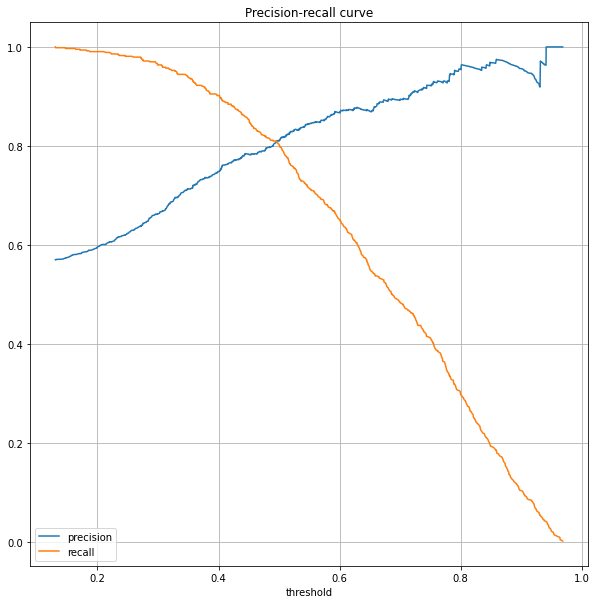

In [ ]:
# Precision-recall curve
prec, rec, thresh = precision_recall_curve(y_test, probabilities_4[:, 1])

ax = plt.figure(figsize = (10, 10))
plt.plot(thresh, prec[:-1], label = 'precision')
plt.plot(thresh, rec[:-1], label = 'recall')
plt.grid()
plt.xlabel("threshold")
plt.title('Precision-recall curve')
plt.legend()

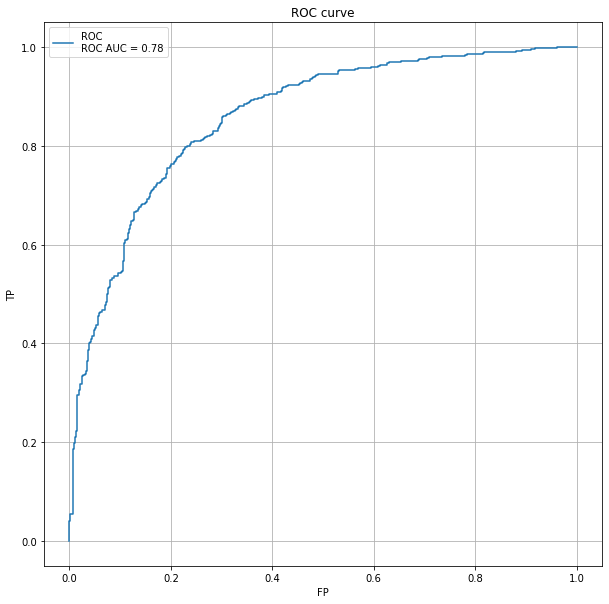

In [ ]:
# ROC curve

fpr, tpr, thr = roc_curve(y_test, probabilities_4[:, 1])
roc_auc = roc_auc_score(y_test, predictions_4)

plt.figure(figsize = (10, 10))
plt.plot(fpr, tpr, label = 'ROC\n' + 'ROC AUC = ' + str(round(roc_auc, 2)))
plt.grid()
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC curve')
plt.legend()

## Avoiding Type II errors

In [ ]:
y_act, y_pred = classifier(y_test, predictions_4)

In [ ]:
precision_new = precision_score(y_act, y_pred)
recall_new = recall_score(y_act, y_pred)
accuracy_new = accuracy_score(y_act, y_pred)
f1_score_new = f1_score(y_act, y_pred)
logloss_new = log_loss(y_act, y_pred)

In [ ]:
print("Precision = ", precision_new)
print("Recall  = ", recall_new)
print('Accuracy = ', accuracy_new)
print("F1 score = ", f1_score_new)
print("Log-loss = ", logloss_new)

Precision =  0.8108974358974359
Recall  =  1.0
Accuracy =  0.8821178821178821
F1 score =  0.8955752212389381
Log-loss =  4.071598368727497
